In [1]:
import dut_func as dut
import serial
import time
import struct
import numpy as np
# from bitarray import bitarray
from bitstring import BitArray
import matplotlib.pyplot as plt
# %config InlineBackend.figure_formats = ['svg']
import dut_a0 as a0

from misc import *

# dut.drv.serUSB = 'COM19'
drv = dut.drv

ser = serial.Serial('COM3', 9600, timeout=1)
dut.connect(ser)

In [8]:
import dut_a0 as a0

In [2]:
dut.reset_chip()
dut.reset_dpe()
dut.ground_PIC()
dut.power_on()

DAC initialized to a span from -10 V to 10 V
Setting vrefs to default


In [3]:
drv.clk_stop('ADC_CK')
drv.clk_stop('CK_ARRAY')
drv.clk_config('ADC_CK', divisor=2)
drv.clk_config('CK_ARRAY', divisor=2)
drv.clk_start('ADC_CK')
drv.clk_start('CK_ARRAY')

Setting ADC_CK freq=50000.0kHz
Setting CK_ARRAY freq=50000.0kHz


In [9]:
dut.power_off()
dut.disconnect()

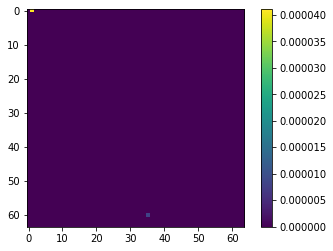

In [4]:
array = 2
Vread = 0.2
gain = -1
Gmap = a0.pic_read_batch(array, Vread=Vread, gain=gain) / Vread
plt.imshow(Gmap)
plt.colorbar()

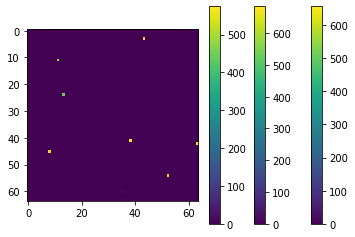

In [7]:
vRead = 0.2
Vgate = 5

arr = 0
numRows = 64
numCols = 64
Gmap0 = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            Gmap0[rr,cc] = 1e6*rdCurr/vRead
plt.imshow(Gmap0)
plt.colorbar()

arr = 1
numRows = 64
numCols = 64
Gmap1 = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            Gmap1[rr,cc] = 1e6*rdCurr/vRead
plt.imshow(Gmap1)
plt.colorbar()

arr = 2
numRows = 64
numCols = 64
Gmap2 = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            Gmap2[rr,cc] = 1e6*rdCurr/vRead
plt.imshow(Gmap2)
plt.colorbar()

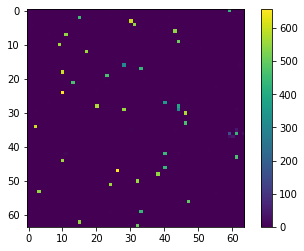

In [8]:
plt.imshow(Gmap0)
plt.colorbar()

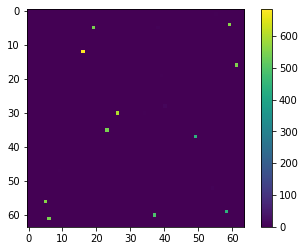

In [9]:
plt.imshow(Gmap1)
plt.colorbar()

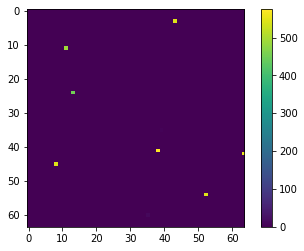

In [10]:
plt.imshow(Gmap2)
plt.colorbar()

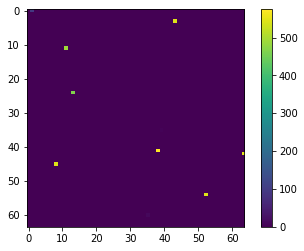

In [5]:
vRead = 0.2
Vgate = 5

arr = 2
numRows = 64
numCols = 64
Gmap2 = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            Gmap2[rr,cc] = 1e6*rdCurr/vRead
plt.imshow(Gmap2)
plt.colorbar()

In [6]:
from lib_data import *
import scipy.io as sio
mat_contents = sio.loadmat('Exported60Node_GraphNum0.mat')
targetA = mat_contents['A']

vRead = 0.2

arr = 2
Vgate = 5
Vref = 0.5

targetGON = 100e-6
targetONTolerance = 3e-6
targetGOFF = 3e-6
targetOFFTolerance = 3e-6

targetG = np.zeros((64,64))
targetG[0:60,0:60] = targetA*(targetGON-targetGOFF) 
targetG = targetG + targetGOFF

targetTolerance = np.ones((64,64))*targetONTolerance

targetGLow = targetG-targetTolerance
targetGHigh = targetG+targetTolerance
    
vSetRamp = np.arange(0.3, 4.1, 0.1)
vGateSetRamp = np.arange(0.5, 1.4, 0.05)
vResetRamp = np.arange(0.3, 4.05, 0.25)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
maxLoops = 3

rowscols=np.nonzero(Gmap2 < targetGLow)
testRows = rowscols[0]
testCols = rowscols[1]

for ii in range(3):
    rr = testRows[ii]
    cc = testCols[ii]        
    initG = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1) / vRead
    finalG = a0.cell_program_with_fb(arr, rr, cc, targetGON, targetONTolerance, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, maxLoops=maxLoops)
    if ( (finalG >= (targetGON-targetONTolerance)) & (finalG <= (targetGON+targetONTolerance)) ):
        print('Success! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG, ' Final G=', finalG, 'Err=', (finalG-targetGON))
    else:
        print('Fail! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG, ' Final G=', finalG, 'Err=', (finalG-targetGON))
    

Device (row= 0 col= 2 ) switched ON at V= 3.1000000000000005
Device (row= 0 col= 2 ) switched ON at Vgate= 1.1000000000000005
Device (row= 0 col= 2 ) switched OFF at V= 0.3
Device (row= 0 col= 2 ) switched OFF at Vgate= 5.0
Success! Array 2 , device (row= 0 col= 2 ) Init G= 0.0  Final G= 0.00010263929618768326 Err= 2.6392961876832525e-06
Device (row= 0 col= 4 ) switched ON at V= 1.4000000000000004
Device (row= 0 col= 4 ) switched ON at Vgate= 1.2000000000000006
Device (row= 0 col= 4 ) switched OFF at V= 0.8
Device (row= 0 col= 4 ) switched OFF at Vgate= 5.0
Device (row= 0 col= 4 ) switched ON at V= 1.5000000000000004
Device (row= 0 col= 4 ) switched ON at Vgate= 1.1000000000000005
Success! Array 2 , device (row= 0 col= 4 ) Init G= 0.0  Final G= 0.00010092864125122187 Err= 9.286412512218698e-07
Device (row= 0 col= 7 ) switched ON at V= 2.900000000000001
Device (row= 0 col= 7 ) switched ON at Vgate= 1.1500000000000006
Device (row= 0 col= 7 ) switched OFF at V= 0.3
Device (row= 0 col= 7 )

In [27]:
Gmap1post[11,11]
#Gmap1post[41,38]
#plt.imshow(Gmap1post[4:16,4:16])
#plt.colorbar()
testRows = [11, 41]
print(testRows[1])
print(np.size(testRows))

41
2


Now turning ON
Set, Vgate =  0.5
1768  are still too far below target Conductance
1768  are still too far below target Conductance
1768  are still too far below target Conductance
1768  are still too far below target Conductance
1767  are still too far below target Conductance
1767  are still too far below target Conductance
1767  are still too far below target Conductance
1767  are still too far below target Conductance
1767  are still too far below target Conductance
1767  are still too far below target Conductance
1767  are still too far below target Conductance
1767  are still too far below target Conductance
1767  are still too far below target Conductance
1767  are still too far below target Conductance
1767  are still too far below target Conductance
1767  are still too far below target Conductance
1767  are still too far below target Conductance
1767  are still too far below target Conductance
1767  are still too far below target Conductance
1767  are still too far below target

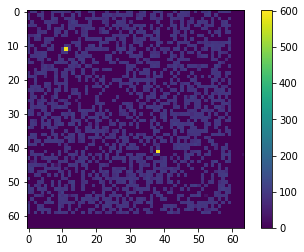

In [7]:
from lib_data import *
import scipy.io as sio
mat_contents = sio.loadmat('Exported60Node_GraphNum0.mat')
targetA = mat_contents['A']

vRead = 0.2

arr = 2
Vgate = 5
Vref = 0.5

targetGON = 100e-6
targetONTolerance = 3e-6
targetGOFF = 3e-6
targetOFFTolerance = 3e-6

targetG = np.zeros((64,64))
targetG[0:60,0:60] = targetA*(targetGON-targetGOFF) 
targetG = targetG + targetGOFF

targetTolerance = np.ones((64,64))*targetONTolerance

vSetRamp = np.arange(0.3, 4.1, 0.1)
vGateSetRamp = np.arange(0.5, 1.65, 0.05)
vResetRamp = np.arange(0.3, 4.05, 0.25)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
maxLoops = 3

finalGM = a0.hybrid_array_program(targetG, targetTolerance, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, arr, maxLoops=maxLoops)

time.sleep(15)
arr = 2
numRows = 64
numCols = 64
Gmap1post = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            Gmap1post[rr,cc] = 1e6*rdCurr/vRead
plt.imshow(Gmap1post)
plt.colorbar()

time.sleep(15)
save_workspace(vars(), note='Prober2_Chp42_Arr2_Hopfield60_After')

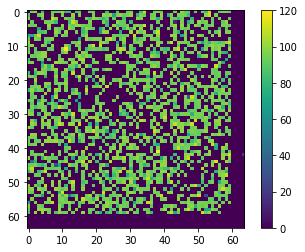

In [8]:
plt.imshow(Gmap1post, clim=[0,120])
plt.colorbar()

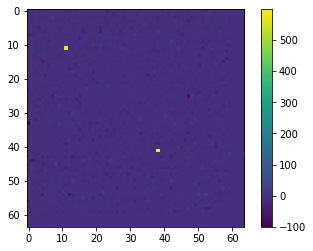

In [11]:
err = Gmap1post - 1e6*targetG
plt.imshow(err)
plt.colorbar()

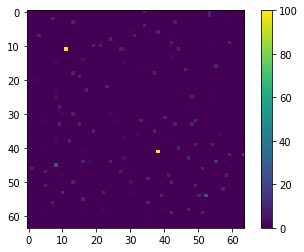

In [13]:
plt.imshow(err, clim=[0,100])
plt.colorbar()
nerr = np.reshape(err, (1,-1))

268.23641061782837


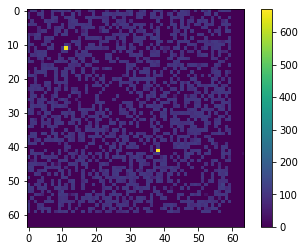

In [15]:
arr = 2
numRows = 64
numCols = 64
Gmap2 = np.zeros((numRows, numCols))
ts = time.time()
for rr in range(numRows):
        for cc in range(numCols):
            #rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            rdCurr = a0.read_single_int(vRead, Vgate, array=2, row=rr, col=cc,gain=-1)
            Gmap2[rr,cc] = 1e6*rdCurr/vRead
print(time.time()-ts)
plt.imshow(Gmap2)
plt.colorbar()

In [35]:
# Turn OFF a few stray devices

from lib_data import *
import scipy.io as sio
mat_contents = sio.loadmat('Exported60Node_GraphNum0.mat')
targetA = mat_contents['A']

vRead = 0.2

arr = 2
Vgate = 5
Vref = 0.5

targetGON = 100e-6
targetONTolerance = 3e-6
targetGOFF = 3e-6
targetOFFTolerance = 3e-6

targetG = np.zeros((64,64))
targetG[0:60,0:60] = targetA*(targetGON-targetGOFF) 
targetG = targetG + targetGOFF

targetTolerance = np.ones((64,64))*targetONTolerance

targetGLow = targetG-targetTolerance
targetGHigh = targetG+targetTolerance
    
vSetRamp = np.arange(0.3, 4.1, 0.1)
vGateSetRamp = np.arange(0.5, 1.5, 0.05)
vResetRamp = np.arange(0.3, 4.8, 0.25)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
maxLoops = 3

testRows = [11, 41]
testCols = [11, 38]

numDevices = np.size(testRows)
finalG = []
initG = []
for ii in range(numDevices):
    rr = testRows[ii]
    cc = testCols[ii]       
    targetConductance = targetG[rr,cc]
    targetTol = targetTolerance[rr,cc]
    initG.append(a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1) / vRead)
    finalG.append(a0.cell_program_with_fb(arr, rr, cc, targetConductance, targetTol, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, maxLoops=maxLoops))
    if ( (finalG[ii] >= (targetConductance-targetTol)) & (finalG[ii] <= (targetConductance+targetTol)) ):
        print('Success! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[ii], ' Final G=', finalG[ii], 'Err=', (finalG[ii]-targetConductance))
    else:
        print('Fail! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[ii], ' Final G=', finalG[ii], 'Err=', (finalG[ii]-targetConductance))
        

Device (row= 11 col= 11 ) switched OFF at V= 3.0500000000000003
Device (row= 11 col= 11 ) switched OFF at Vgate= 5.0
Success! Array 2 , device (row= 11 col= 11 ) Init G= 0.0005747800586510263  Final G= 0.0 Err= -3e-06
Device (row= 41 col= 38 ) switched OFF at V= 2.5500000000000003
Device (row= 41 col= 38 ) switched OFF at Vgate= 5.0
Success! Array 2 , device (row= 41 col= 38 ) Init G= 0.0006021505376344084  Final G= 1.3685239491691102e-06 Err= -1.6314760508308899e-06


273.0418710708618


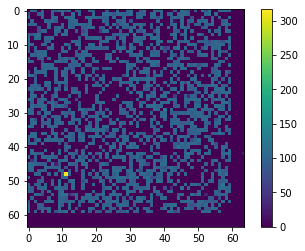

In [36]:
arr = 2
numRows = 64
numCols = 64
Gmap2 = np.zeros((numRows, numCols))
ts = time.time()
for rr in range(numRows):
        for cc in range(numCols):
            #rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            rdCurr = a0.read_single_int(vRead, Vgate, array=2, row=rr, col=cc,gain=-1)
            Gmap2[rr,cc] = 1e6*rdCurr/vRead
print(time.time()-ts)
plt.imshow(Gmap2)
plt.colorbar()

In [38]:
# Turn OFF a few stray devices

from lib_data import *
import scipy.io as sio
mat_contents = sio.loadmat('Exported60Node_GraphNum0.mat')
targetA = mat_contents['A']

vRead = 0.2

arr = 2
Vgate = 5
Vref = 0.5

targetGON = 100e-6
targetONTolerance = 3e-6
targetGOFF = 3e-6
targetOFFTolerance = 3e-6

targetG = np.zeros((64,64))
targetG[0:60,0:60] = targetA*(targetGON-targetGOFF) 
targetG = targetG + targetGOFF

targetTolerance = np.ones((64,64))*targetONTolerance

targetGLow = targetG-targetTolerance
targetGHigh = targetG+targetTolerance
    
vSetRamp = np.arange(0.3, 4.1, 0.1)
vGateSetRamp = np.arange(0.5, 1.5, 0.05)
vResetRamp = np.arange(0.3, 4.8, 0.25)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
maxLoops = 3

testRows = [48]
testCols = [11]

numDevices = np.size(testRows)
finalG = []
initG = []
for ii in range(numDevices):
    rr = testRows[ii]
    cc = testCols[ii]       
    targetConductance = targetG[rr,cc]
    targetTol = targetTolerance[rr,cc]
    initG.append(a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1) / vRead)
    finalG.append(a0.cell_program_with_fb(arr, rr, cc, targetConductance, targetTol, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, maxLoops=maxLoops))
    if ( (finalG[ii] >= (targetConductance-targetTol)) & (finalG[ii] <= (targetConductance+targetTol)) ):
        print('Success! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[ii], ' Final G=', finalG[ii], 'Err=', (finalG[ii]-targetConductance))
    else:
        print('Fail! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[ii], ' Final G=', finalG[ii], 'Err=', (finalG[ii]-targetConductance))
        

Device (row= 48 col= 11 ) switched OFF at V= 3.0500000000000003
Device (row= 48 col= 11 ) switched OFF at Vgate= 5.0
Success! Array 2 , device (row= 48 col= 11 ) Init G= 0.0003039263603779732  Final G= 0.0 Err= -3e-06


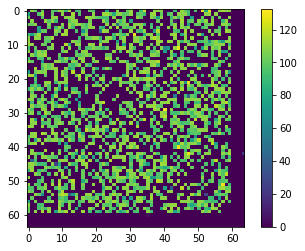

In [41]:
plt.imshow(Gmap2)
plt.colorbar()

In [47]:
save_workspace({'Gmap2' : Gmap2 }, note='Prober2_Chp42_Arr2_Hopfield60_FixStrays')

Saving Gmap2(<class 'numpy.ndarray'>), to 20191031-114147-Prober2_Chp42_Arr2_Hopfield60_FixStrays.pkl
Saving Gmap2(<class 'numpy.ndarray'>), to 20191031-114147-Prober2_Chp42_Arr2_Hopfield60_FixStrays.mat


In [50]:
Gmap22 = Gmap2*1e-6
DiffG = np.abs(Gmap22 - targetG)
rowscols=np.nonzero(DiffG >20e-6)
testRows = rowscols[0]
testCols = rowscols[1]

print(testRows)
print(testCols)
numDevices = np.size(testRows)
print(numDevices)
for ii in range(numDevices):
    rr = testRows[ii]
    cc = testCols[ii]
    print('Device = (',rr, ',', cc, '), TargetG =', targetG[rr,cc], ', Current G=', Gmap22[rr,cc])


[ 0  0  0  0  1  2  2  4  4  5  6  6  6  6  7  7  7  9  9  9 10 10 11 11
 11 11 11 12 12 14 15 16 17 17 18 18 19 19 19 21 21 23 25 25 25 26 27 28
 29 30 32 33 35 37 38 39 39 39 40 42 42 43 43 43 44 45 45 45 47 47 47 49
 49 51 52 52 53 54 54 54 54 55 55 56 57 59 59 59]
[23 51 52 53  0 38 48 26 47  3  3 16 21 37  1 31 51 26 53 57 12 28 40 41
 44 49 51 40 57 11  4 50 12 32  0 59  2 28 35 46 47  9  7 43 47 14 15 11
 40 12  2  0 23 49 48 11 44 55 44 47 63 19 33 39  1  8  9 35 22 33 55 36
 37 57 40 42 56  4 12 13 52 30 56  0 48  8 27 43]
88
Device = ( 0 , 23 ), TargetG = 0.0001 , Current G= 7.860459433040077e-05
Device = ( 0 , 51 ), TargetG = 0.0001 , Current G= 0.0001277289019224503
Device = ( 0 , 52 ), TargetG = 0.0001 , Current G= 7.754969045291626e-05
Device = ( 0 , 53 ), TargetG = 0.0001 , Current G= 0.0001277289019224503
Device = ( 1 , 0 ), TargetG = 0.0001 , Current G= 7.754969045291626e-05
Device = ( 2 , 38 ), TargetG = 0.0001 , Current G= 7.412838057999348e-05
Device = ( 2 , 48 ), T

Device (row= 0 col= 23 ) switched ON at V= 1.4000000000000004
Device (row= 0 col= 23 ) switched ON at Vgate= 1.1500000000000006
Success! Array 2 , device (row= 0 col= 23 ) Init G= 7.65518084066471e-05  Final G= 0.00010035842293906808 Err= 3.584229390680711e-07
Device (row= 0 col= 51 ) switched OFF at V= 0.8
Device (row= 0 col= 51 ) switched OFF at Vgate= 5.0
Device (row= 0 col= 51 ) switched ON at V= 1.5000000000000004
Device (row= 0 col= 51 ) switched ON at Vgate= 1.2000000000000006
Success! Array 2 , device (row= 0 col= 51 ) Init G= 0.00011404366243075916  Final G= 0.00010035842293906808 Err= 3.584229390680711e-07
Device (row= 0 col= 52 ) switched ON at V= 2.7000000000000006
Device (row= 0 col= 52 ) switched ON at Vgate= 1.2000000000000006
Device (row= 0 col= 52 ) switched OFF at V= 0.8
Device (row= 0 col= 52 ) switched OFF at Vgate= 5.0
Device (row= 0 col= 52 ) switched ON at V= 2.4000000000000004
Device (row= 0 col= 52 ) switched ON at Vgate= 1.1500000000000006
Success! Array 2 , d

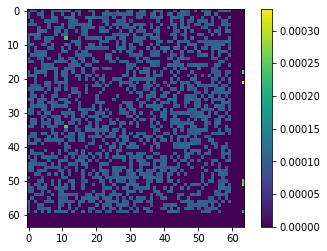

In [51]:
# Switch all devices with error > 20e-6
# Gmap2 has the current conductances in microSiemens

from lib_data import *
import scipy.io as sio
mat_contents = sio.loadmat('Exported60Node_GraphNum0.mat')
targetA = mat_contents['A']

vRead = 0.2

arr = 2
Vgate = 5
Vref = 0.5

targetGON = 100e-6
targetONTolerance = 3e-6
targetGOFF = 3e-6
targetOFFTolerance = 3e-6

targetG = np.zeros((64,64))
targetG[0:60,0:60] = targetA*(targetGON-targetGOFF) 
targetG = targetG + targetGOFF

targetTolerance = np.ones((64,64))*targetONTolerance

targetGLow = targetG-targetTolerance
targetGHigh = targetG+targetTolerance
    
vSetRamp = np.arange(0.3, 4.1, 0.1)
vGateSetRamp = np.arange(0.5, 1.5, 0.05)
vResetRamp = np.arange(0.3, 4.8, 0.25)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
maxLoops = 4

Gmap22 = Gmap2*1e-6
DiffG = np.abs(Gmap22 - targetG)
rowscols=np.nonzero(DiffG >20e-6)
testRows = rowscols[0]
testCols = rowscols[1]

numDevices = np.size(testRows)
finalG = []
initG = []

for ii in range(numDevices):
    rr = testRows[ii]
    cc = testCols[ii]       
    targetConductance = targetG[rr,cc]
    targetTol = targetTolerance[rr,cc]
    initG.append(a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1) / vRead)
    finalG.append(a0.cell_program_with_fb(arr, rr, cc, targetConductance, targetTol, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, maxLoops=maxLoops))
    if ( (finalG[ii] >= (targetConductance-targetTol)) & (finalG[ii] <= (targetConductance+targetTol)) ):
        print('Success! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[ii], ' Final G=', finalG[ii], 'Err=', (finalG[ii]-targetConductance))
    else:
        print('Fail! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[ii], ' Final G=', finalG[ii], 'Err=', (finalG[ii]-targetConductance))
        

arr = 2
numRows = 64
numCols = 64
Gmap2Fix = np.zeros((numRows, numCols))
ts = time.time()
for rr in range(numRows):
        for cc in range(numCols):
            #rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            rdCurr = a0.read_single_int(vRead, Vgate, array=2, row=rr, col=cc,gain=-1)
            Gmap2Fix[rr,cc] = rdCurr/vRead
print(time.time()-ts)
plt.imshow(Gmap2Fix)
plt.colorbar()

In [55]:
Gmap2Fix[8,11]
Gmap2Fix[34,11]


0.00024747474747474743

In [56]:
# Turn OFF a few stray devices

from lib_data import *
import scipy.io as sio
mat_contents = sio.loadmat('Exported60Node_GraphNum0.mat')
targetA = mat_contents['A']

vRead = 0.2

arr = 2
Vgate = 5
Vref = 0.5

targetGON = 100e-6
targetONTolerance = 3e-6
targetGOFF = 3e-6
targetOFFTolerance = 3e-6

targetG = np.zeros((64,64))
targetG[0:60,0:60] = targetA*(targetGON-targetGOFF) 
targetG = targetG + targetGOFF

targetTolerance = np.ones((64,64))*targetONTolerance

targetGLow = targetG-targetTolerance
targetGHigh = targetG+targetTolerance
    
vSetRamp = np.arange(0.3, 4.1, 0.1)
vGateSetRamp = np.arange(0.5, 1.5, 0.05)
vResetRamp = np.arange(0.3, 4.8, 0.25)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
maxLoops = 3

testRows = [8, 34]
testCols = [11, 11]

numDevices = np.size(testRows)
finalG = []
initG = []
for ii in range(numDevices):
    rr = testRows[ii]
    cc = testCols[ii]       
    targetConductance = targetG[rr,cc]
    targetTol = targetTolerance[rr,cc]
    initG.append(a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1) / vRead)
    finalG.append(a0.cell_program_with_fb(arr, rr, cc, targetConductance, targetTol, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, maxLoops=maxLoops))
    if ( (finalG[ii] >= (targetConductance-targetTol)) & (finalG[ii] <= (targetConductance+targetTol)) ):
        print('Success! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[ii], ' Final G=', finalG[ii], 'Err=', (finalG[ii]-targetConductance))
    else:
        print('Fail! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[ii], ' Final G=', finalG[ii], 'Err=', (finalG[ii]-targetConductance))
        

Device (row= 8 col= 11 ) switched OFF at V= 2.5500000000000003
Device (row= 8 col= 11 ) switched OFF at Vgate= 5.0
Success! Array 2 , device (row= 8 col= 11 ) Init G= 0.00022352557836428802  Final G= 2.805474095796676e-06 Err= -1.9452590420332428e-07
Device (row= 34 col= 11 ) switched OFF at V= 3.0500000000000003
Device (row= 34 col= 11 ) switched OFF at Vgate= 5.0
Success! Array 2 , device (row= 34 col= 11 ) Init G= 0.00023721081785597914  Final G= 0.0 Err= -3e-06


271.8060128688812


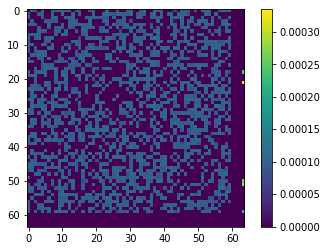

In [57]:
arr = 2
numRows = 64
numCols = 64
Gmap2Fix = np.zeros((numRows, numCols))
ts = time.time()
for rr in range(numRows):
        for cc in range(numCols):
            #rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            rdCurr = a0.read_single_int(vRead, Vgate, array=2, row=rr, col=cc,gain=-1)
            Gmap2Fix[rr,cc] = rdCurr/vRead
print(time.time()-ts)
plt.imshow(Gmap2Fix)
plt.colorbar()

In [58]:
save_workspace({'Gmap2Fix' : Gmap2Fix}, note='Prober2_Chp42_Arr2_Hopfield60_MoreFixes')

Saving Gmap2Fix(<class 'numpy.ndarray'>), to 20191031-155845-Prober2_Chp42_Arr2_Hopfield60_MoreFixes.pkl
Saving Gmap2Fix(<class 'numpy.ndarray'>), to 20191031-155845-Prober2_Chp42_Arr2_Hopfield60_MoreFixes.mat


In [61]:
# Turn OFF a few stray devices

from lib_data import *
import scipy.io as sio
mat_contents = sio.loadmat('Exported60Node_GraphNum0.mat')
targetA = mat_contents['A']

vRead = 0.2

arr = 2
Vgate = 5
Vref = 0.5

targetGON = 100e-6
targetONTolerance = 3e-6
targetGOFF = 3e-6
targetOFFTolerance = 3e-6

targetG = np.zeros((64,64))
targetG[0:60,0:60] = targetA*(targetGON-targetGOFF) 
targetG = targetG + targetGOFF

targetTolerance = np.ones((64,64))*targetONTolerance

targetGLow = targetG-targetTolerance
targetGHigh = targetG+targetTolerance
    
vSetRamp = np.arange(0.3, 4.1, 0.1)
#vGateSetRamp = np.arange(0.5, 1.5, 0.05)
vGateSetRamp = np.arange(0.8, 1.5, 0.05)
vResetRamp = np.arange(0.3, 4.8, 0.25)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
maxLoops = 3

testRows = [33]
testCols = [0]

numDevices = np.size(testRows)
finalG = []
initG = []
for ii in range(numDevices):
    rr = testRows[ii]
    cc = testCols[ii]       
    targetConductance = targetG[rr,cc]
    targetTol = targetTolerance[rr,cc]
    initG.append(a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1) / vRead)
    finalG.append(a0.cell_program_with_fb(arr, rr, cc, targetConductance, targetTol, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, maxLoops=maxLoops))
    if ( (finalG[ii] >= (targetConductance-targetTol)) & (finalG[ii] <= (targetConductance+targetTol)) ):
        print('Success! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[ii], ' Final G=', finalG[ii], 'Err=', (finalG[ii]-targetConductance))
    else:
        print('Fail! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[ii], ' Final G=', finalG[ii], 'Err=', (finalG[ii]-targetConductance))
        

Device (row= 33 col= 0 ) never switched ON sufficiently
Device (row= 33 col= 0 ) never switched ON sufficiently
Fail! Array 2 , device (row= 33 col= 0 ) Init G= 0.0  Final G= 0.0 Err= -0.0001


In [62]:
# Turn OFF a few stray devices

from lib_data import *
import scipy.io as sio
mat_contents = sio.loadmat('Exported60Node_GraphNum0.mat')
targetA = mat_contents['A']

vRead = 0.2

arr = 2
Vgate = 5
Vref = 0.5

targetGON = 100e-6
targetONTolerance = 3e-6
targetGOFF = 3e-6
targetOFFTolerance = 3e-6

targetG = np.zeros((64,64))
targetG[0:60,0:60] = targetA*(targetGON-targetGOFF) 
targetG = targetG + targetGOFF

targetTolerance = np.ones((64,64))*targetONTolerance

targetGLow = targetG-targetTolerance
targetGHigh = targetG+targetTolerance
    
vSetRamp = np.arange(0.3, 4.9, 0.1)
#vGateSetRamp = np.arange(0.5, 1.5, 0.05)
vGateSetRamp = np.arange(0.8, 1.5, 0.05)
vResetRamp = np.arange(0.3, 4.8, 0.25)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
maxLoops = 3

testRows = [33]
testCols = [0]

numDevices = np.size(testRows)
finalG = []
initG = []
for ii in range(numDevices):
    rr = testRows[ii]
    cc = testCols[ii]       
    targetConductance = targetG[rr,cc]
    targetTol = targetTolerance[rr,cc]
    initG.append(a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1) / vRead)
    finalG.append(a0.cell_program_with_fb(arr, rr, cc, targetConductance, targetTol, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, maxLoops=maxLoops))
    if ( (finalG[ii] >= (targetConductance-targetTol)) & (finalG[ii] <= (targetConductance+targetTol)) ):
        print('Success! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[ii], ' Final G=', finalG[ii], 'Err=', (finalG[ii]-targetConductance))
    else:
        print('Fail! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[ii], ' Final G=', finalG[ii], 'Err=', (finalG[ii]-targetConductance))
        

Device (row= 33 col= 0 ) never switched ON sufficiently
Device (row= 33 col= 0 ) never switched ON sufficiently
Fail! Array 2 , device (row= 33 col= 0 ) Init G= 0.0  Final G= 0.0 Err= -0.0001


272.71080017089844


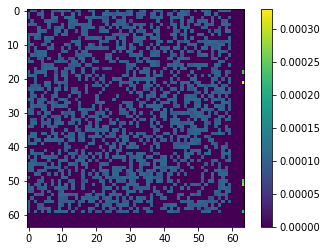

In [63]:
arr = 2
numRows = 64
numCols = 64
Gmap2FixFinal = np.zeros((numRows, numCols))
ts = time.time()
for rr in range(numRows):
        for cc in range(numCols):
            #rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            rdCurr = a0.read_single_int(vRead, Vgate, array=2, row=rr, col=cc,gain=-1)
            Gmap2FixFinal[rr,cc] = rdCurr/vRead
print(time.time()-ts)
plt.imshow(Gmap2FixFinal)
plt.colorbar()

In [68]:
DiffG = np.abs(Gmap2FixFinal - targetG)
rowscols=np.nonzero( (DiffG >7e-6) & (DiffG <40e-6))
testRows = rowscols[0]
testCols = rowscols[1]

numDevices = np.size(testRows)
print(numDevices)

1099


Device (row= 0 col= 1 ) switched ON at V= 3.800000000000001
Device (row= 0 col= 1 ) switched ON at Vgate= 1.1000000000000005
Success! Array 2 , device (row= 0 col= 1 ) Init G= 9.579667644183771e-05  Final G= 0.00010035842293906808 Err= 3.584229390680711e-07
Success! Array 2 , device (row= 0 col= 9 ) Init G= 0.00010035842293906808  Final G= 0.00010035842293906808 Err= 3.584229390680711e-07
Device (row= 0 col= 10 ) switched ON at V= 1.6000000000000005
Device (row= 0 col= 10 ) switched ON at Vgate= 1.1000000000000005
Success! Array 2 , device (row= 0 col= 10 ) Init G= 9.579667644183771e-05  Final G= 0.00010263929618768326 Err= 2.6392961876832525e-06
Device (row= 0 col= 11 ) switched ON at V= 2.6000000000000005
Device (row= 0 col= 11 ) switched ON at Vgate= 1.1500000000000006
Device (row= 0 col= 11 ) switched OFF at V= 0.55
Device (row= 0 col= 11 ) switched OFF at Vgate= 5.0
Device (row= 0 col= 11 ) switched ON at V= 1.2000000000000004
Device (row= 0 col= 11 ) switched ON at Vgate= 0.55
Su

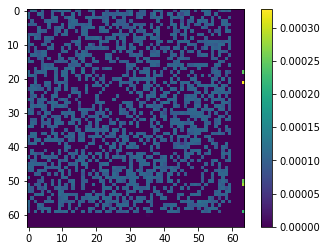

In [69]:
# Switch all devices with error > 20e-6
# Gmap2 has the current conductances in microSiemens

from lib_data import *
import scipy.io as sio
mat_contents = sio.loadmat('Exported60Node_GraphNum0.mat')
targetA = mat_contents['A']

vRead = 0.2

arr = 2
Vgate = 5
Vref = 0.5

targetGON = 100e-6
targetONTolerance = 3e-6
targetGOFF = 3e-6
targetOFFTolerance = 3e-6

targetG = np.zeros((64,64))
targetG[0:60,0:60] = targetA*(targetGON-targetGOFF) 
targetG = targetG + targetGOFF

targetTolerance = np.ones((64,64))*targetONTolerance

targetGLow = targetG-targetTolerance
targetGHigh = targetG+targetTolerance
    
vSetRamp = np.arange(0.3, 4.1, 0.1)
vGateSetRamp = np.arange(0.55, 1.5, 0.05)
vResetRamp = np.arange(0.3, 4.8, 0.25)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
maxLoops = 4

DiffG = np.abs(Gmap2FixFinal - targetG)
rowscols=np.nonzero( (DiffG >7e-6) & (DiffG <40e-6))
testRows = rowscols[0]
testCols = rowscols[1]

numDevices = np.size(testRows)
finalG = []
initG = []

for ii in range(numDevices):
    rr = testRows[ii]
    cc = testCols[ii]       
    targetConductance = targetG[rr,cc]
    targetTol = targetTolerance[rr,cc]
    initG.append(a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1) / vRead)
    finalG.append(a0.cell_program_with_fb(arr, rr, cc, targetConductance, targetTol, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, maxLoops=maxLoops))
    if ( (finalG[ii] >= (targetConductance-targetTol)) & (finalG[ii] <= (targetConductance+targetTol)) ):
        print('Success! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[ii], ' Final G=', finalG[ii], 'Err=', (finalG[ii]-targetConductance))
    else:
        print('Fail! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[ii], ' Final G=', finalG[ii], 'Err=', (finalG[ii]-targetConductance))
        

arr = 2
numRows = 64
numCols = 64
Gmap2FixFinal2 = np.zeros((numRows, numCols))
ts = time.time()
for rr in range(numRows):
        for cc in range(numCols):
            #rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            rdCurr = a0.read_single_int(vRead, Vgate, array=2, row=rr, col=cc,gain=-1)
            Gmap2FixFinal2[rr,cc] = rdCurr/vRead
print(time.time()-ts)
plt.imshow(Gmap2FixFinal2)
plt.colorbar()

save_workspace(vars(), note='Prober2_Chp42_Arr2_Hopfield60_EvenMoreFixes')

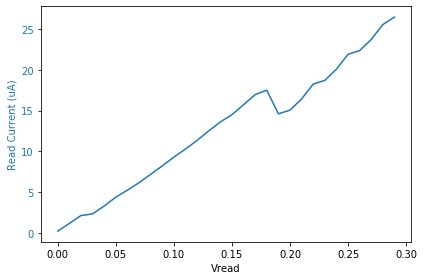

In [70]:
arr=2
rr=0
cc=33

Vreads = np.arange(0, 0.3, 0.01)
Vgate = 5
Vref = 0.5
rdCurrs = []
    
for vRead in Vreads:
    rdCurrs.append(a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1))

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Vread')
ax1.set_ylabel('Read Current (uA)', color=color)
ax1.plot(Vreads, [i* 1e6 for i in rdCurrs], color=color)
ax1.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  
plt.show()

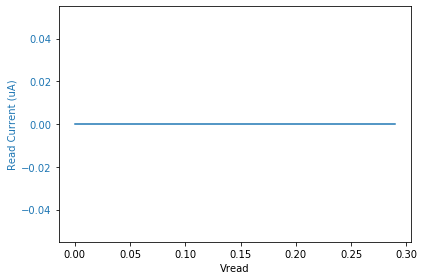

In [71]:
arr=2
rr=33
cc=0

Vreads = np.arange(0, 0.3, 0.01)
Vgate = 5
Vref = 0.5
rdCurrs = []
    
for vRead in Vreads:
    rdCurrs.append(a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1))

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Vread')
ax1.set_ylabel('Read Current (uA)', color=color)
ax1.plot(Vreads, [i* 1e6 for i in rdCurrs], color=color)
ax1.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  
plt.show()

In [72]:
# Turn OFF a few stray devices

from lib_data import *
import scipy.io as sio
mat_contents = sio.loadmat('Exported60Node_GraphNum0.mat')
targetA = mat_contents['A']

vRead = 0.2

arr = 2
Vgate = 5
Vref = 0.5

targetGON = 100e-6
targetONTolerance = 3e-6
targetGOFF = 3e-6
targetOFFTolerance = 3e-6

targetG = np.zeros((64,64))
targetG[0:60,0:60] = targetA*(targetGON-targetGOFF) 
targetG = targetG + targetGOFF

targetTolerance = np.ones((64,64))*targetONTolerance

targetGLow = targetG-targetTolerance
targetGHigh = targetG+targetTolerance
    
vSetRamp = np.arange(0.3, 3.7, 0.1)
#vGateSetRamp = np.arange(0.5, 1.5, 0.05)
vGateSetRamp = np.arange(0.5, 1.5, 0.05)
vResetRamp = np.arange(0.3, 4.8, 0.25)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
maxLoops = 3

testRows = [0]
testCols = [33]

numDevices = np.size(testRows)
finalG = []
initG = []
for ii in range(numDevices):
    rr = testRows[ii]
    cc = testCols[ii]       
    targetConductance = targetGOFF
    targetTol = targetOFFTolerance
    initG.append(a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1) / vRead)
    finalG.append(a0.cell_program_with_fb(arr, rr, cc, targetConductance, targetTol, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, maxLoops=maxLoops))
    if ( (finalG[ii] >= (targetConductance-targetTol)) & (finalG[ii] <= (targetConductance+targetTol)) ):
        print('Success! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[ii], ' Final G=', finalG[ii], 'Err=', (finalG[ii]-targetConductance))
    else:
        print('Fail! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[ii], ' Final G=', finalG[ii], 'Err=', (finalG[ii]-targetConductance))
        

Device (row= 0 col= 33 ) switched OFF at V= 1.5500000000000003
Device (row= 0 col= 33 ) switched OFF at Vgate= 5.0
Success! Array 2 , device (row= 0 col= 33 ) Init G= 7.526881720430108e-05  Final G= 4.379276637341154e-06 Err= 1.3792766373411539e-06


275.34302020072937


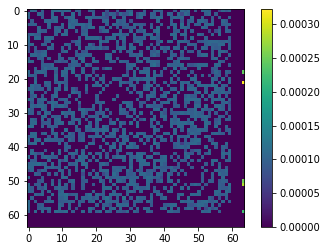

In [73]:

arr = 2
numRows = 64
numCols = 64
Gmap2Finale = np.zeros((numRows, numCols))
ts = time.time()
for rr in range(numRows):
        for cc in range(numCols):
            #rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            rdCurr = a0.read_single_int(vRead, Vgate, array=2, row=rr, col=cc,gain=-1)
            Gmap2Finale[rr,cc] = rdCurr/vRead
print(time.time()-ts)
plt.imshow(Gmap2Finale)
plt.colorbar()

In [81]:
save_workspace({'Gmap2Finale' : Gmap2Finale},note='Prober2_Gmap2Finale')

Saving Gmap2Finale(<class 'numpy.ndarray'>), to 20191102-094409-Prober2_Gmap2Finale.pkl
Saving Gmap2Finale(<class 'numpy.ndarray'>), to 20191102-094409-Prober2_Gmap2Finale.mat
